# Imports

In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
import datetime
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics, ensemble, tree, model_selection
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from imblearn.combine import SMOTETomek
from collections import Counter
!pip install matplotlib-label-lines
from labellines import labelLine, labelLines
from sklearn.utils.class_weight import compute_sample_weight
%matplotlib inline

In [ ]:
def data():
    data = pd.read_csv("dataset (1).csv")

    feature_list = ['uri', 'key', 'duration']
    data = data.drop(feature_list, axis=1)
    cleaned_data = data.drop_duplicates()

    encodings = {
        'h': 0,
        's': 1
    }
    cleaned_data['h/s'] = cleaned_data['h/s'].apply(lambda x: encodings[x])

    X = cleaned_data.drop('h/s', axis=1).values
    y = cleaned_data['h/s'].values
    return X, y

# Baseline Model

In [ ]:
def ANNBaslineModel():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    weights = compute_sample_weight(class_weight='balanced', y=y_train)

    model = keras.Sequential([
        keras.layers.Dense(16, input_dim=9, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNBaslineModel = ANNBaslineModel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
270/270 [==============================] - 2s 5ms/step - loss: 10.9199 - accuracy: 0.4738 - val_loss: 0.6811 - val_accuracy: 0.5512
Epoch 2/50
270/270 [==============================] - 1s 5ms/step - loss: 0.6750 - accuracy: 0.5913 - val_loss: 0.6652 - val_accuracy: 0.5970
Epoch 3/50
270/270 [==============================] - 1s 4ms/step - loss: 0.6657 - accuracy: 0.6077 - val_loss: 0.6533 - val_accuracy: 0.6247
Epoch 4/50
270/270 [=======

# Data Sampling

In [ ]:
def ANNDataSampling():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

    model = keras.Sequential([
        keras.layers.Dense(16, input_dim=9, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNDataSampling = ANNDataSampling()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                160       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] - 1s 4ms/step - loss: 5.6784 - accuracy: 0.5365 - val_loss: 0.6800 - val_accuracy: 0.5872
Epoch 2/50
259/259 [==============================] - 1s 5ms/step - loss: 0.6751 - accuracy: 0.5911 - val_loss: 0.7155 - val_accuracy: 0.5133
Epoch 3/50
259/259 [==============================] - 1s 4ms/step - loss: 0.6645 - accuracy: 0.6043 - val_loss: 0.6527 - val_accuracy: 0.6338
Epoch 4/50
259/259 [======

# Data Scaling with Data Sampling

In [ ]:
def ANNDataScaling():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    model = keras.Sequential([
        keras.layers.Dense(16, input_dim=9, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNDataScaling = ANNDataScaling()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                160       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] - 1s 3ms/step - loss: 0.6350 - accuracy: 0.6485 - val_loss: 0.6125 - val_accuracy: 0.6705
Epoch 2/50
259/259 [==============================] - 1s 2ms/step - loss: 0.6115 - accuracy: 0.6712 - val_loss: 0.6025 - val_accuracy: 0.6753
Epoch 3/50
259/259 [==============================] - 1s 2ms/step - loss: 0.6056 - accuracy: 0.6769 - val_loss: 0.6004 - val_accuracy: 0.6815
Epoch 4/50
259/259 [======

# Three Hidden layers added along with Data Sampling and Scaling

In [ ]:
def ANNHiddenLayers():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    # THREE HIDDEN LAYERS ADDED
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=9, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNHiddenLayers = ANNHiddenLayers()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] 

# Activation Changed from Relu to Tanh (Three Hidden layers, Data Sampling and Scaling)

In [ ]:
def ANNTanh():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    # THREE HIDDEN LAYERS ADDED
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=9, activation='tanh'),
        keras.layers.Dense(32, activation='tanh'),
        keras.layers.Dense(16, activation='tanh'),
        keras.layers.Dense(8, activation='tanh'),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNTanh = ANNTanh()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                640       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] 

# Activation Changed from Relu to Sigmoid (Three Hidden layers, Data Sampling and Scaling)

In [ ]:
def ANNSigmoid():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    # THREE HIDDEN LAYERS ADDED
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=9, activation='sigmoid'),
        keras.layers.Dense(32, activation='sigmoid'),
        keras.layers.Dense(16, activation='sigmoid'),
        keras.layers.Dense(8, activation='sigmoid'),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNSigmoid = ANNSigmoid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                640       
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] 

# Optimizer Changed from ADAM to SGD (Three Hidden layers, Data Sampling and Scaling)

In [ ]:
def ANNSGD():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    # THREE HIDDEN LAYERS ADDED
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=9, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.SGD(learning_rate=0.1)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNSGD = ANNSGD()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                640       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] 

# Regularizer Added (Three Hidden layers, Data Sampling and Scaling, Adam Optimizer)

In [ ]:
def ANNRegularizer():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    # THREE HIDDEN LAYERS ADDED
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=9, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(32, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(16, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(8, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNRegularizer = ANNRegularizer()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                640       
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] 

# Batch Size changed to 32 (Three Hidden layers, Data Sampling and Scaling, Adam and regularizer) 

In [ ]:
def ANNBatchSizeFrom64To32():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    # THREE HIDDEN LAYERS ADDED
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=9, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(32, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(16, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(8, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50,callbacks=[tensorboard_callback])
    return history

ANNBatchSizeFrom64To32 = ANNBatchSizeFrom64To32()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                640       
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
518/518 [==============================] 

# Learning Rate

In [ ]:
def LearningRate1():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    # THREE HIDDEN LAYERS ADDED
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=9, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(32, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(16, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(8, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

LearningRate1 = LearningRate1()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                640       
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dense_40 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] 

In [ ]:
def LearningRate2():
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    X, y = data()
    
    # DATA SAMPLING
    smk = SMOTETomek()
    X_res,y_res=smk.fit_resample(X, y)

    # DATA SCALING
    scaler = StandardScaler()
    scaler.fit(X_res)
    scaled_data = scaler.transform(X_res)
    audio_features_scaled = scaled_data

    X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, y_res, test_size=0.3)

    # THREE HIDDEN LAYERS ADDED
    model = keras.Sequential([
        keras.layers.Dense(64, input_dim=9, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(32, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(16, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(8, activation='relu', activity_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(2, activation='softmax')
    ])

    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50,callbacks=[tensorboard_callback])
    return history

LearningRate2 = LearningRate2()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                640       
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dense_44 (Dense)            (None, 8)                 136       
                                                                 
 dense_45 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================]

# Plotting

In [ ]:
def plot(legend_title):
  # Plot train accuracy
  plt.yticks(np.arange(0.45,0.80,0.02))
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(legend_title, loc='lower right')
  labelLines(plt.gca().get_lines(), zorder=2.5)
  plt.show()

def testPlot(legend_title):
  # Plot test accuracy
  plt.yticks(np.arange(0.45,0.80,0.02))
  plt.title('model validation accuracy')
  plt.ylabel('validation accuracy')
  plt.xlabel('epoch')
  plt.legend(legend_title, loc='lower right')
  labelLines(plt.gca().get_lines(), zorder=2.5)
  plt.show()

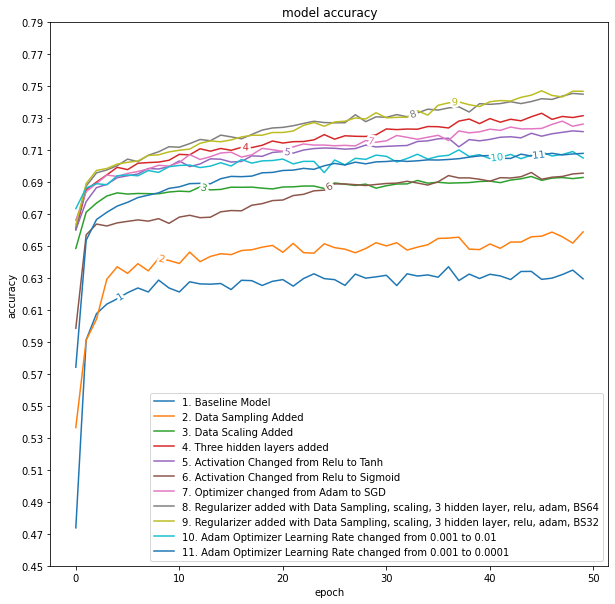

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(ANNBaslineModel.history['accuracy'],label="1")
plt.plot(ANNDataSampling.history['accuracy'],label="2")
plt.plot(ANNDataScaling.history['accuracy'],label="3")
plt.plot(ANNHiddenLayers.history['accuracy'],label="4")
plt.plot(ANNTanh.history['accuracy'],label="5")
plt.plot(ANNSigmoid.history['accuracy'],label="6")
plt.plot(ANNSGD.history['accuracy'],label="7")
plt.plot(ANNRegularizer.history['accuracy'],label="8")
plt.plot(ANNBatchSizeFrom64To32.history['accuracy'],label="9")
plt.plot(LearningRate1.history['accuracy'],label="10")
plt.plot(LearningRate2.history['accuracy'],label="11")
# plt.plot(addWeights.history['accuracy'],label="12")
plot(['1. Baseline Model','2. Data Sampling Added','3. Data Scaling Added','4. Three hidden layers added', '5. Activation Changed from Relu to Tanh','6. Activation Changed from Relu to Sigmoid',
      '7. Optimizer changed from Adam to SGD','8. Regularizer added with Data Sampling, scaling, 3 hidden layer, relu, adam, BS64','9. Regularizer added with Data Sampling, scaling, 3 hidden layer, relu, adam, BS32','10. Adam Optimizer Learning Rate changed from 0.001 to 0.01',
      '11. Adam Optimizer Learning Rate changed from 0.001 to 0.0001'])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit